# Week 2

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
from plotly import express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

## Excercise 2

In this excercise we will manually fit a linear regression model to given data

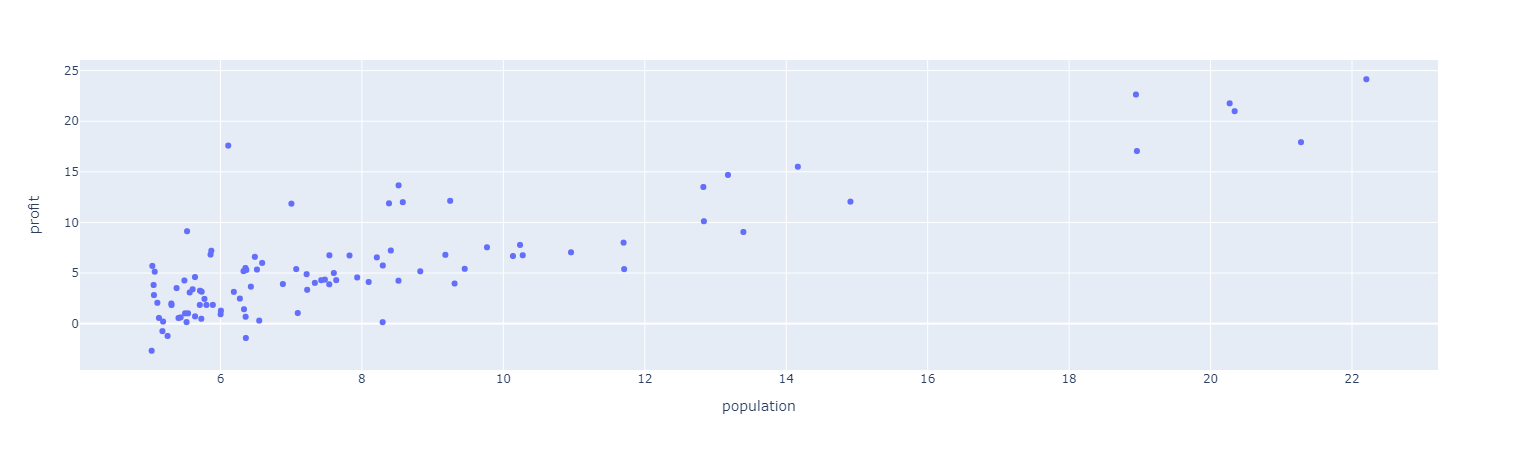

In [91]:
df = pd.read_csv("ex1data1.csv", names = ['population', 'profit'])
px.scatter(df,'population', 'profit')

The data seems to follow a linear trend, thus linear regression model would be a good aproximation for predicting the data

We will first implement it by hand, and then with a built in function

In [92]:
m = len(df)

In [93]:
x = df['population'] # training feature
y = df['profit'] # target

In [94]:
X = np.array([[1]*m,x]).T
y = np.array([y]).T
theta = np.array([[-4],[-4]])

In [95]:
iterations = 1500
alpha = 0.0001

In [96]:
def cost_function(X, y , theta):
    return (1 / (2*m)) * np.power(X@theta - y,2).sum()

In [97]:
cost_function(X,y,theta)

1106.533015642363

In [98]:
def gradient_descent(X, y, theta, learning_rate, iterations, cost_fun = cost_function):
    m = len(y)
    cost_history = []
    theta_history = []
    
    for i in range(iterations):
        
        error = X@theta - y
        theta  = theta - (1/m)*learning_rate*X.T@error
        
        cost_history.append( cost_function(X,y,theta) )
        theta_history.append(theta)
        
    return theta, cost_history, theta_history                                              

In [99]:
t,c_h,t_h = gradient_descent(X,y,theta,alpha,iterations)

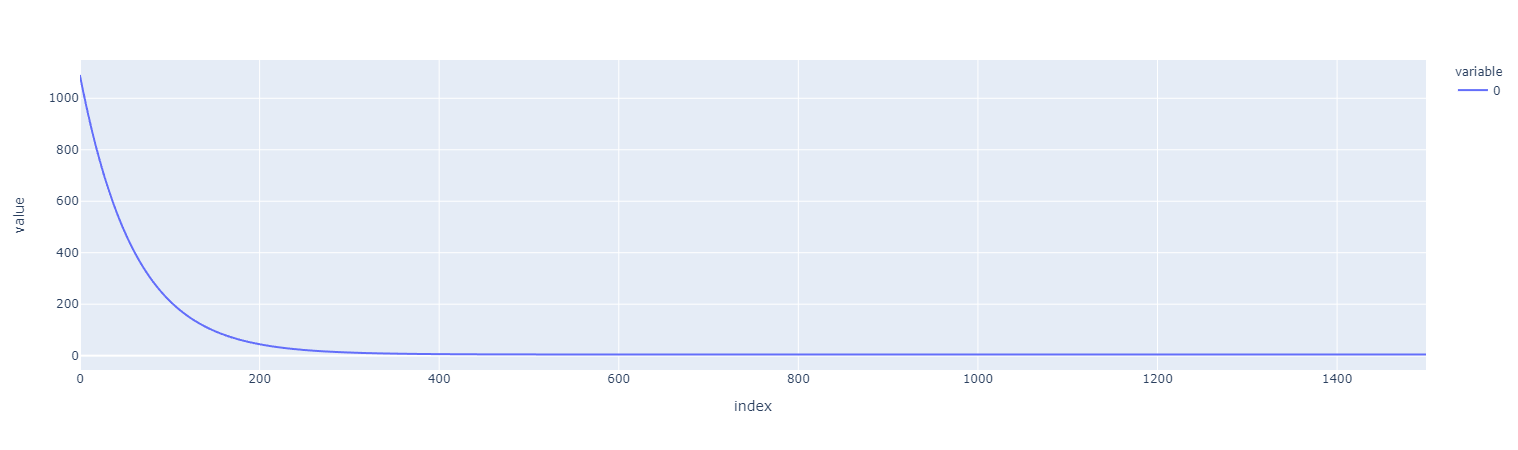

In [100]:
px.line(c_h)

The cost function is decreasing with each itteration as expected

In [104]:
prediction = x*t[1] + t[0]

In [174]:
auto_predict = np.polyfit(x,y,deg = 1)
auto_values = x*auto_predict[0] + auto_predict[1]

In [173]:
np.polyfit(x,y,deg = 1,)

array([[ 1.19303364],
       [-3.89578088]])

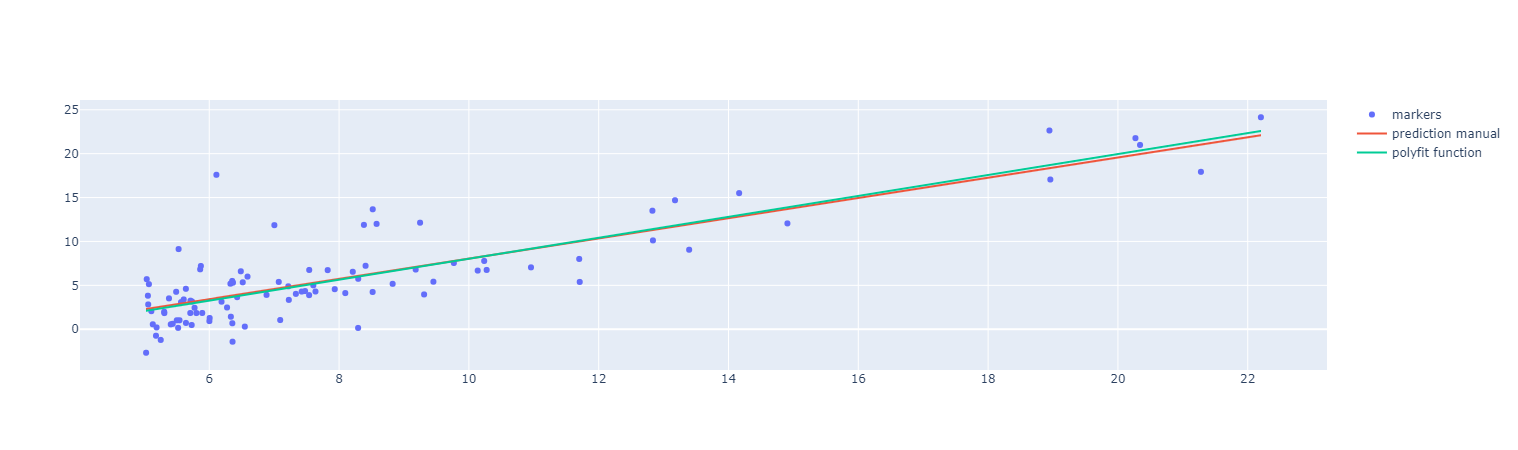

In [175]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y.T[0],
                    mode='markers',
                    name='markers'))
fig.add_trace(go.Scatter(x=x, y=prediction,
                    mode='lines',
                    name='prediction manual'))
fig.add_trace(go.Scatter(x=x, y=auto_values,
                    mode='lines',
                    name='polyfit function'))


The best fit predicted red line

In [106]:
lin_space = np.linspace(-5,5,100)
t1 = []
t2 = []
cost_fun = []

for xs in lin_space:
    for ys in lin_space:
        t1.append(xs),
        t2.append(ys),
        cost_fun.append(cost_function(X,y, np.array([[xs],[ys]])))

path_t1 = [i.item(0,0) for i in t_h]
path_t2 = [i.item(1,0) for i in t_h]

In [127]:
fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
        x=t1, y=t2, z=cost_fun,
        mode='markers',
        marker=dict(
                size=4,
                color=cost_fun,
                colorscale='Plotly3',
                reversescale = True,
                opacity=0.6
                )
                )
)
fig.add_trace(
    go.Scatter3d(
        x=path_t1[:800], y=path_t2[:800], z=c_h[:800],
        mode='markers',
        marker = dict(size = 5)
                )
)

Path of gradient descent given starting point (-4,-4)

## Excercise 3

Linear regression with multiple variables

In [119]:
df = pd.read_csv("ex1data2.csv", names = ['size','rooms', 'price'])

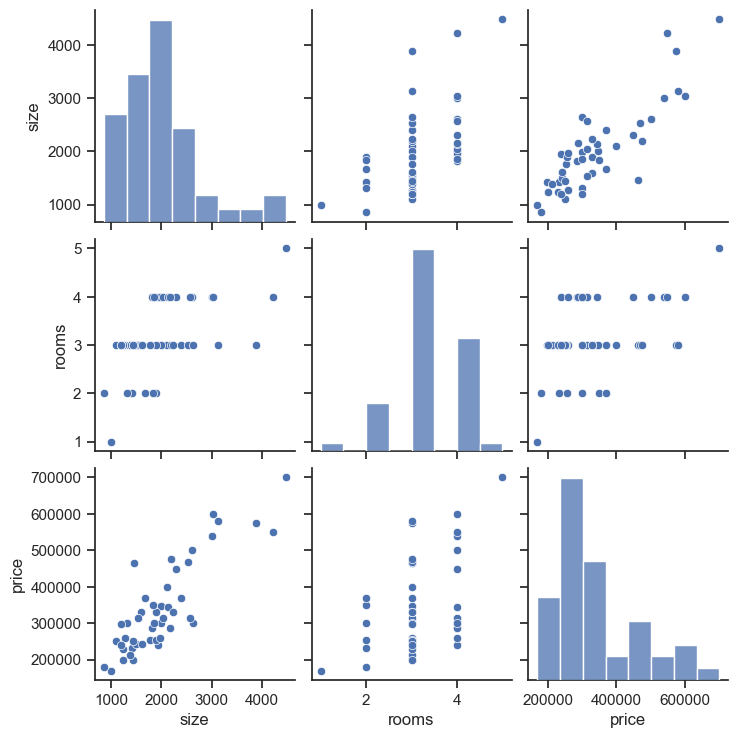

In [126]:
sns.pairplot(df)

In [129]:
df.describe()

,size,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


We need to standardize the data 

In [161]:
def standardize_data(X):
    std = np.std(X,ddof=1)
    x_bar = X.mean()
    X_stand = [(x-x_bar) / std for x in X]
    
    return X_stand, x_bar, std

In [162]:
def revert_data(X_stand, x_bar, std):
    X = [x*std+x_bar for x in X_stand]
    return X

In [168]:
size_stand, size_bar, size_std = standardize_data(df['size'])
rooms_stand, rooms_bar, rooms_std = standardize_data(df['rooms'])
price_stand, price_bar, price_std = standardize_data(df['price'])

In [169]:
df_stand = pd.DataFrame([size_stand,rooms_stand,price_stand]).T
df_stand.columns = df.columns